In [1]:
import os
import glob

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

In [2]:
N_MgII = 0
sigma_MgII = 0
N_SiII = 0
sigma_SiII = 0
N_PII = 0
sigma_PII = 0
N_SII = 0
sigma_SII = 0
N_CrII = 0
sigma_CrII = 0
N_FeII = 0
sigma_FeII = 0
N_NiII = 0
sigma_NiII = 0
N_ZnII = 0
sigma_ZnII = 0
N_CuII = 0
sigma_CuII = 0

In [3]:
def random_effects(means, stds):

    means = np.array(means)
    stds = np.array(stds)
    
    var  = stds ** 2
    w_FE = 1 / var
    mu_FE = (w_FE * means).sum() / w_FE.sum()

    Q  = (w_FE * (means - mu_FE) ** 2).sum()
    df = len(means) - 1
    c  = w_FE.sum() - (w_FE ** 2).sum() / w_FE.sum()

    T_squared = max(0.0, (Q - df) / c)

    weights = 1 / (var + T_squared)

    combined_mean = (weights * means).sum() / weights.sum()
    combined_std  = np.sqrt(1 / weights.sum())

    return combined_mean, combined_std

In [4]:
data = {}
for file in glob.glob("abundances_*"):
    with open(file, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 3:
                transition = parts[0]
                N = float(parts[1])
                sigma = float(parts[2])
            elif len(parts) == 4:
                transition = "".join(parts[:-2])
                N = float(parts[2])
                sigma = float(parts[3])
            else:
                continue
            if transition not in data:
                data[transition] = []
            data[transition].append((N, sigma))

abundances = {}
for transition, measurements in data.items():
    means = [v for v, e in measurements]
    stds = [e for v, e in measurements]
    if len(means) == 0:
        combined_N, combined_sigma = 0, 0
    elif len(means) == 1:
        combined_N, combined_sigma = means[0], stds[0]
    else:
        combined_N, combined_sigma = random_effects(means, stds)

    abundances[f"N_{transition}"] = combined_N
    abundances[f"sigma_{transition}"] = combined_sigma

globals().update(abundances)

In [5]:
N_HI = 21.7
sigma_N_HI = 0.5
N_H_2 = 0
sigma_N_H_2 = 0
N_H = np.log10(10 ** N_HI + 2 * 10 ** N_H_2)
sigma_N_H = np.sqrt(((10 ** N_HI) / (10 ** N_HI + 2 * 10 ** N_H_2) * sigma_N_HI) ** 2 + ((2 * 10 ** N_H_2) / (10 ** N_HI + 2 * 10 ** N_H_2) * sigma_N_H_2) ** 2)

In [16]:
MgII_H = N_MgII - N_H + 12
SiII_H = N_SiII - N_H + 12
PII_H = N_PII - N_H + 12
SII_H = N_SII - N_H + 12
CrII_H = N_CrII - N_H + 12
FeII_H = N_FeII - N_H + 12
NiII_H = N_NiII - N_H + 12
ZnII_H = N_ZnII - N_H + 12
CuII_H = N_CuII - N_H + 12
if N_OI != 0:
    print("S: ", OI_H, "+/-", sigma_OI)
if N_SII != 0:
    print("S: ", SII_H, "+/-", sigma_SII)
if N_FeII != 0:
    print("Fe: ", FeII_H, "+/-", sigma_FeII)

S:  8.139926415503654 +/- 0.111
S:  8.248000000000001 +/- 0.332
Fe:  5.888 +/- 0.066


In [7]:
MgII_H_LMC = 7.26
sigma_MgII_H_LMC = 0.08
SiII_H_LMC = 7.35
sigma_SiII_H_LMC = 0.10
PII_H_LMC = 5.10
sigma_PII_H_LMC = 0.1
SII_H_LMC = 6.94
sigma_SII_H_LMC = 0.04
CrII_H_LMC = 5.37
sigma_CrII_H_LMC = 0.07
FeII_H_LMC = 7.32
sigma_FeII_H_LMC = 0.08
NiII_H_LMC = 5.92
sigma_NiII_H_LMC = 0.07
ZnII_H_LMC = 4.31
sigma_ZnII_H_LMC = 0.15
CuII_H_LMC = 3.89
sigma_CuII_H_LMC = 0.04

In [8]:
depletion_MgII = MgII_H - MgII_H_LMC
sigma_depletion_MgII = sigma_MgII ** 2 + sigma_MgII_H_LMC ** 2 + sigma_N_H ** 2
depletion_SiII = SiII_H - SiII_H_LMC
sigma_depletion_SiII = sigma_SiII ** 2 + sigma_SiII_H_LMC ** 2 + sigma_N_H ** 2
depletion_PII = PII_H - PII_H_LMC
sigma_depletion_PII = sigma_PII ** 2 + sigma_PII_H_LMC ** 2 + sigma_N_H ** 2
depletion_SII = SII_H - SII_H_LMC
sigma_depletion_SII = sigma_SII ** 2 + sigma_SII_H_LMC ** 2 + sigma_N_H ** 2
depletion_CrII = CrII_H - CrII_H_LMC
sigma_depletion_CrII = sigma_CrII ** 2 + sigma_CrII_H_LMC ** 2 + sigma_N_H ** 2
depletion_FeII = FeII_H - FeII_H_LMC
sigma_depletion_FeII = sigma_FeII ** 2 + sigma_FeII_H_LMC ** 2 + sigma_N_H ** 2
depletion_NiII = NiII_H - NiII_H_LMC
sigma_depletion_NiII = sigma_NiII ** 2 + sigma_NiII_H_LMC ** 2 + sigma_N_H ** 2
depletion_ZnII = ZnII_H - ZnII_H_LMC
sigma_depletion_ZnII = sigma_ZnII ** 2 + sigma_ZnII_H_LMC ** 2 + sigma_N_H ** 2
depletion_CuII = CuII_H - CuII_H_LMC
sigma_depletion_CuII = sigma_CuII ** 2 + sigma_CuII_H_LMC ** 2 + sigma_N_H ** 2

In [9]:
A_MgII = -0.60
sigma_A_MgII = 0.11
B_MgII = -0.50
sigma_B_MgII = 0.02
z_MgII = 0.407
F_star_MgII = (depletion_MgII - B_MgII) / A_MgII + z_MgII
sigma_F_star_MgII = np.sqrt((sigma_depletion_MgII / A_MgII) ** 2 + (sigma_B_MgII / A_MgII) ** 2 + ((depletion_MgII - B_MgII) * sigma_A_MgII / A_MgII ** 2) ** 2)

A_SiII = -1.11
sigma_A_SiII = 0.12
B_SiII = -0.68
sigma_B_SiII = 0.03
z_SiII = 0.247
F_star_SiII = (depletion_SiII - B_SiII) / A_SiII + z_SiII
sigma_F_star_SiII = np.sqrt((sigma_depletion_SiII / A_SiII) ** 2 + (sigma_B_SiII / A_SiII) ** 2 + ((depletion_SiII - B_SiII) * sigma_A_SiII / A_SiII ** 2) ** 2)

A_PII = -1
sigma_A_PII = 0
B_PII = -1
sigma_B_PII = 0
z_PII = 1
F_star_PII = (depletion_PII - B_PII) / A_PII + z_PII
sigma_F_star_PII  = np.sqrt((sigma_depletion_PII  / A_PII ) ** 2 + (sigma_B_PII  / A_PII ) ** 2 + ((depletion_PII  - B_PII ) * sigma_A_PII  / A_PII  ** 2) ** 2)

A_SII = -1.02
sigma_A_SII = 0.10
B_SII = -0.31
sigma_B_SII = 0.02
z_SII = 0.137
F_star_SII = (depletion_SII - B_SII) / A_SII + z_SII
sigma_F_star_SII  = np.sqrt((sigma_depletion_SII  / A_SII ) ** 2 + (sigma_B_SII  / A_SII ) ** 2 + ((depletion_SII  - B_SII ) * sigma_A_SII  / A_SII  ** 2) ** 2)

A_CrII = -1.18
sigma_A_CrII = 0.08
B_CrII = -1.13
sigma_B_CrII = 0.02
z_CrII = 0.368
F_star_CrII = (depletion_CrII - B_CrII) / A_CrII + z_CrII
sigma_F_star_CrII = np.sqrt((sigma_depletion_CrII / A_CrII) ** 2 + (sigma_B_CrII / A_CrII) ** 2 + ((depletion_CrII - B_CrII) * sigma_A_CrII / A_CrII ** 2) ** 2)

A_FeII = -1.28
sigma_A_FeII = 0.04
B_FeII = -1.51
sigma_B_FeII = 0.03
z_FeII = 0.437
F_star_FeII = (depletion_FeII - B_FeII) / A_FeII + z_FeII
sigma_F_star_FeII = np.sqrt((sigma_depletion_FeII / A_FeII) ** 2 + (sigma_B_FeII / A_FeII) ** 2 + ((depletion_FeII - B_FeII) * sigma_A_FeII / A_FeII ** 2) ** 2)

A_NiII = -1.29
sigma_A_NiII = 0.08
B_NiII = -1.26
sigma_B_NiII = 0.02
z_NiII = 0.338
F_star_NiII = (depletion_NiII - B_NiII) / A_NiII + z_NiII
sigma_F_star_NiII = np.sqrt((sigma_depletion_NiII / A_NiII) ** 2 + (sigma_B_NiII / A_NiII) ** 2 + ((depletion_NiII - B_NiII) * sigma_A_NiII / A_NiII ** 2) ** 2)

A_ZnII = -0.73
sigma_A_ZnII = 0.07
B_ZnII = -0.36
sigma_B_ZnII = 0.02
z_ZnII = 0.358
F_star_ZnII = (depletion_ZnII - B_ZnII) / A_ZnII + z_ZnII
sigma_F_star_ZnII = np.sqrt((sigma_depletion_ZnII / A_ZnII) ** 2 + (sigma_B_ZnII / A_ZnII) ** 2 + ((depletion_ZnII - B_ZnII) * sigma_A_ZnII / A_ZnII ** 2) ** 2)

A_CuII = -1.15
sigma_A_CuII = 0.42
B_CuII = -0.44
sigma_B_CuII = 0.09
z_CuII = 0.325
F_star_CuII = (depletion_CuII - B_CuII) / A_CuII + z_CuII
sigma_F_star_CuII = np.sqrt((sigma_depletion_CuII / A_CuII) ** 2 + (sigma_B_CuII / A_CuII) ** 2 + ((depletion_CuII - B_CuII) * sigma_A_CuII / A_CuII ** 2) ** 2)

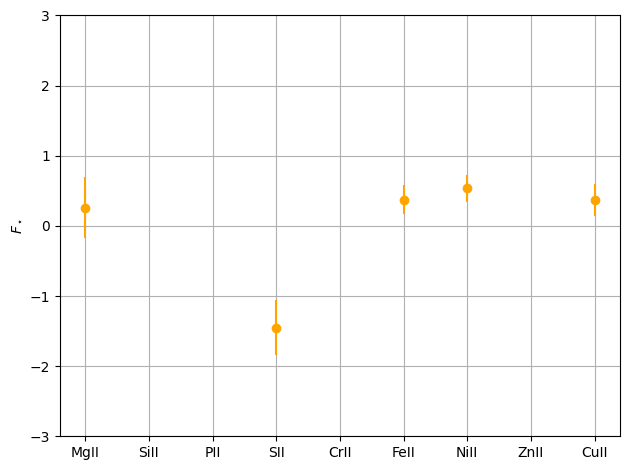

In [10]:
F_stars = np.array([F_star_MgII, F_star_SiII, F_star_PII, F_star_SII, F_star_CrII, F_star_FeII, F_star_NiII, F_star_ZnII, F_star_CuII])
sigma_F_stars = np.array([sigma_F_star_MgII, sigma_F_star_SiII, sigma_F_star_PII, sigma_F_star_SII, sigma_F_star_CrII, sigma_F_star_FeII, sigma_F_star_NiII, sigma_F_star_ZnII, sigma_F_star_CuII])
labels = ['MgII', 'SiII', 'PII', 'SII', 'CrII', 'FeII', 'NiII', 'ZnII', 'CuII']

x = np.arange(9)

plt.errorbar(x, F_stars, fmt = 'o', yerr = sigma_F_stars, color = 'orange')
plt.ylim(-3, 3)
plt.xticks(x, labels)
plt.ylabel(r'$F_\star$')
plt.grid()
plt.tight_layout()

plt.show()

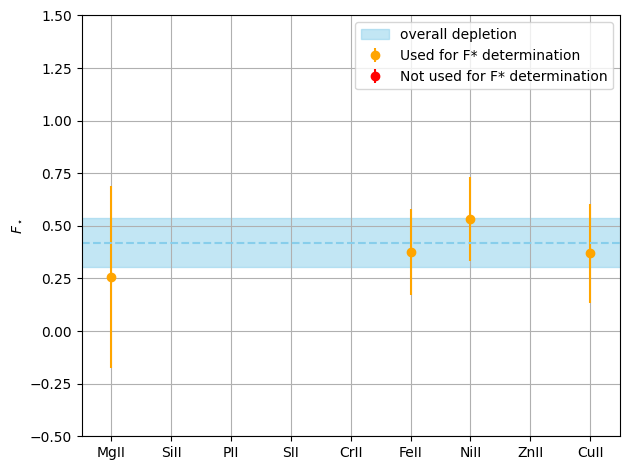

0.4202700296247317 0.11743252607494374
0.3760625000000003 0.20506827795146365


In [11]:
good = ['MgII', 'FeII', 'NiII', 'CuII']
good_mask = np.isin(labels, good)
valid_F_stars = F_stars[good_mask]
valid_sigma_F_stars = sigma_F_stars[good_mask]

var  = valid_sigma_F_stars ** 2
w_FE = 1 / var
mu_FE = (w_FE * valid_F_stars).sum() / w_FE.sum()

Q  = (w_FE * (valid_F_stars - mu_FE) ** 2).sum()
df = len(valid_F_stars) - 1
c  = w_FE.sum() - (w_FE ** 2).sum() / w_FE.sum()

T_squared = max(0.0, (Q - df) / c)

weights = 1 / (var + T_squared)

F_star = (weights * valid_F_stars).sum() / weights.sum()
sigma_F_star  = np.sqrt(1 / weights.sum())

plt.errorbar(x[good_mask], F_stars[good_mask], fmt = 'o', yerr = sigma_F_stars[good_mask], color = 'orange', label = 'Used for F* determination')
plt.errorbar(x[~good_mask], F_stars[~good_mask], fmt = 'o', yerr = sigma_F_stars[~good_mask], color = 'red', label = 'Not used for F* determination')

plt.fill_between([-1, 10], F_star - sigma_F_star, F_star + sigma_F_star, color = 'skyblue', alpha = 0.5, label = 'overall depletion')
plt.axhline(F_star, color = 'skyblue', linestyle = '--')

plt.xlim(-0.5, 8.5)
plt.ylim(-0.5, 1.5)
plt.xticks(x, labels)
plt.ylabel(r'$F_\star$')
plt.grid()
plt.tight_layout()
plt.legend()

plt.show()

print(F_star, sigma_F_star)
print(F_star_FeII, sigma_F_star_FeII)

In [14]:
# END